<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Введение

По заданию отдела маркетинга «Бета-Банка» необходимо обучить модель, прогнозирующую отток клиентов. Для проверки качества модели нужно использовать метрики F1-меру и AUC-ROC. F1- мера модели кандидата должна быть не меньше 0.59.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Обнаружил 909 нулевых значений поля Tenure. Заменил их медианным значением.

In [5]:
#print(len(data.loc[data['CustomerId'].isna()]))
#print(len(data.loc[data['Surname'].isna()]))
#print(len(data.loc[data['CreditScore'].isna()]))
#print(len(data.loc[data['Geography'].isna()]))
#print(len(data.loc[data['Gender'].isna()]))
#print(len(data.loc[data['Age'].isna()]))
print(len(data.loc[data['Tenure'].isna()]))
#print(len(data.loc[data['Balance'].isna()]))
#print(len(data.loc[data['NumOfProducts'].isna()]))
#print(len(data.loc[data['HasCrCard'].isna()]))
#print(len(data.loc[data['IsActiveMember'].isna()]))
#print(len(data.loc[data['EstimatedSalary'].isna()]))
#print(len(data.loc[data['Exited'].isna()]))

909


In [6]:
data.loc[data['Tenure'].isna(),'Tenure'] = data['Tenure'].median()

Дибликатов не обнаружено.

In [7]:
print(data.duplicated().sum())

0


Удалил поля RowNumber и CustomerId, т.к. они не несут никакой полезной информации для нашей модели.

In [8]:
data.drop("RowNumber", axis=1, inplace=True)
data.drop("CustomerId", axis=1, inplace=True)

Предотвращаю попадание в дамми-ловушку при помощи метода get_dummies().

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [10]:
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'] , axis=1)

Разобью исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [11]:
features_main, features_test, target_main, target_test = train_test_split(features, target, test_size=0.20, random_state=12345, stratify=target)

In [12]:
print(features_test.shape)
print(target_test.shape)

(2000, 2942)
(2000,)


In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(features_main, target_main, test_size=0.25, random_state=12345, stratify=target_main)

In [14]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 2942)
(2000,)


In [15]:
print(features_train.shape)
print(target_train.shape)

(6000, 2942)
(6000,)


Выделяю числовые признаки и масштабирую их с помощью функции Scaler.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

Проверю сбалансированность классов в таргете.

In [17]:
(target[target == 0]).size

7963

In [18]:
(target[target == 1]).size

2037

## Вывод

Проверил данные на пропуски и дубликаты. Удалил поля, не имеющие смысла для обучения. Провёл профилактику попадания в дамми-ловушку. Разобил исходные данные на обучающую, валидационную и тестовую выборки. Разбил данные на обучающие и целевые признаки. Выделил и промасштабировал числовые признаки. Проверил сбалансированность классов в таргете.
Классы в таргете не сбалансированы. Нулей 79.63%, единиц 20.37%. Т.е. примерно на 8 нулей (клиент остался) приходится 2 единицы (клиент ушёл).

## Исследование задачи

Исследую модели на несбалансированных данных.

Вначале исследую модель решающего дерева.

In [19]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.0
  AUC-ROC = 0.7020417952621343
max_depth = 2
  F1 = 0.514792899408284
  AUC-ROC = 0.7397559346711888
max_depth = 3
  F1 = 0.375
  AUC-ROC = 0.8041878550353126
max_depth = 4
  F1 = 0.5168539325842697
  AUC-ROC = 0.8272193611176661
max_depth = 5
  F1 = 0.46315789473684216
  AUC-ROC = 0.8356947085760646
max_depth = 6
  F1 = 0.5382165605095541
  AUC-ROC = 0.8310521615606361
max_depth = 7
  F1 = 0.546583850931677
  AUC-ROC = 0.8283522351318962
max_depth = 8
  F1 = 0.586552217453505
  AUC-ROC = 0.8149991285584507
max_depth = 9
  F1 = 0.5923836389280677
  AUC-ROC = 0.8017856068703527
max_depth = 10
  F1 = 0.5583456425406204
  AUC-ROC = 0.7868708461928802
max_depth = 11
  F1 = 0.5698005698005698
  AUC-ROC = 0.7544262290025002
max_depth = 12
  F1 = 0.5658263305322129
  AUC-ROC = 0.7443846003168038
max_depth = 13
  F1 = 0.5542857142857144
  AUC-ROC = 0.7338201067014626
max_depth = 14
  F1 = 0.5619834710743801
  AUC-ROC = 0.7151635456720202
max_depth = 15
  F1 = 0.5516304

In [20]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

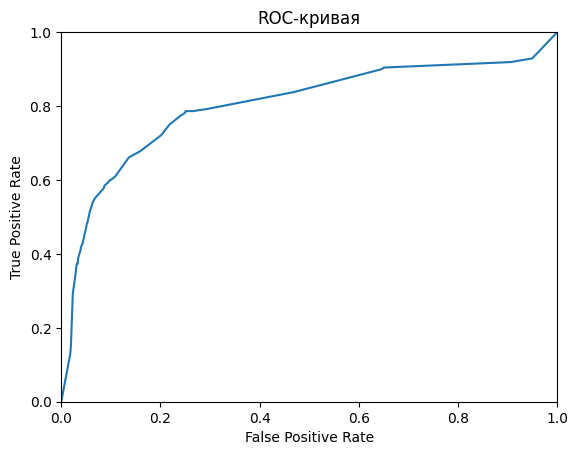

In [21]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель решающего дерева показала наилучший результат  F1 = 0.5923836389280677 AUC-ROC = 0.8017856068703527 при max_depth=9

Исследую модель случайного леса.

In [22]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

est = 1
  F1 = 0.43680981595092033
  AUC-ROC = 0.6464823837705194
est = 2
  F1 = 0.30127041742286753
  AUC-ROC = 0.7108456684727871
est = 3
  F1 = 0.43113772455089816
  AUC-ROC = 0.7360727445473209
est = 4
  F1 = 0.35650623885918
  AUC-ROC = 0.7619283381995247
est = 5
  F1 = 0.4517133956386293
  AUC-ROC = 0.775208181987843
est = 6
  F1 = 0.40773286467486825
  AUC-ROC = 0.7845233523199625
est = 7
  F1 = 0.4807692307692308
  AUC-ROC = 0.7969525766135935
est = 8
  F1 = 0.4275618374558304
  AUC-ROC = 0.7975402212690349
est = 9
  F1 = 0.49754500818330605
  AUC-ROC = 0.8041600922956855
est = 10
  F1 = 0.4663212435233161
  AUC-ROC = 0.804225643208694
est = 11
  F1 = 0.4999999999999999
  AUC-ROC = 0.8070019171714087
est = 12
  F1 = 0.4716006884681584
  AUC-ROC = 0.8126308126308126
est = 13
  F1 = 0.5155993431855501
  AUC-ROC = 0.8129439146388298
est = 14
  F1 = 0.48109965635738833
  AUC-ROC = 0.8148749674173403
est = 15
  F1 = 0.5215946843853821
  AUC-ROC = 0.8159276379615362
est = 16
  F1 = 0

In [23]:
model = RandomForestClassifier(random_state=12345, n_estimators=15)
model.fit(features_train, target_train) 
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

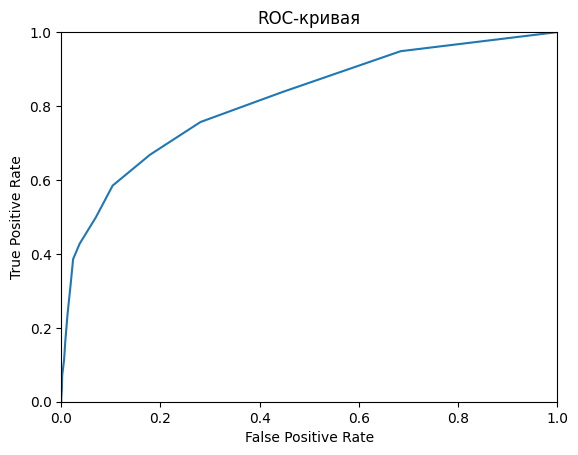

In [24]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель случайного леса показала наилучший результат  F1 = 0.5215946843853821 AUC-ROC = 0.8159276379615362 при n_estimators=15

Исследую модель логистической регрессии.

In [25]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

itr = 500
  F1 = 0.34050179211469533
  AUC-ROC = 0.7699301767098378
itr = 600
  F1 = 0.34050179211469533
  AUC-ROC = 0.7699301767098378
itr = 700
  F1 = 0.34050179211469533
  AUC-ROC = 0.7699301767098378
itr = 800
  F1 = 0.34050179211469533
  AUC-ROC = 0.7699301767098378
itr = 900
  F1 = 0.34050179211469533
  AUC-ROC = 0.7699301767098378


In [26]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

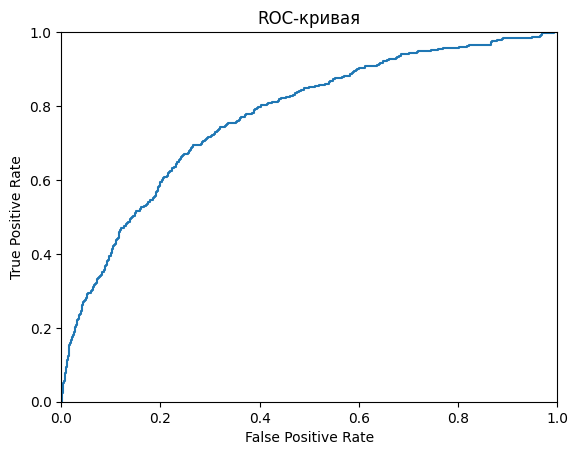

In [27]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 


Модель логистической регрессии показала наилучший результат F1 = 0.34050179211469533 AUC-ROC = 0.7699301767098378 при max_iter=500

## Вывод

На несбалансированных данных наилучший результат достигнут моделью решающего дерева  F1 = 0.5923836389280677 AUC-ROC = 0.8017856068703527 при max_depth=9

## Борьба с дисбалансом

Исходные данные несбалансированы примерно 8:2. Т.е. на каждые 8 случаев, когда клиент остался, приходится 2 случая, когда клиент ушёл.

In [28]:
features_zeros = features_train[target_train == 0] 
features_ones = features_train[target_train == 1] 
target_zeros = target_train[target_train == 0] 
target_ones = target_train[target_train == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4777, 2942)
(1223, 2942)
(4777,)
(1223,)


Увеличил количество единиц при помощи техники upsampling.

In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

features_zeros = features_upsampled[target_upsampled == 0] 
features_ones = features_upsampled[target_upsampled == 1] 
target_zeros = target_upsampled[target_upsampled == 0] 
target_ones = target_upsampled[target_upsampled == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4777, 2942)
(2446, 2942)
(4777,)
(2446,)


Уменьшил количество нолей при помощи техники downsampling

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.512)

features_zeros = features_balanced[target_balanced == 0] 
features_ones = features_balanced[target_balanced == 1] 
target_zeros = target_balanced[target_balanced == 0] 
target_ones = target_balanced[target_balanced == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(2446, 2942)
(2446, 2942)
(2446,)
(2446,)


Проверяю модель решающего дерева на сбалансированных данных.

In [31]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.4804381846635367
  AUC-ROC = 0.7001253950406494
max_depth = 2
  F1 = 0.4860681114551083
  AUC-ROC = 0.7406111812891475
max_depth = 3
  F1 = 0.5159817351598174
  AUC-ROC = 0.7942888959838112
max_depth = 4
  F1 = 0.5220883534136547
  AUC-ROC = 0.8137351527182035
max_depth = 5
  F1 = 0.5546942291128337
  AUC-ROC = 0.832865993882943
max_depth = 6
  F1 = 0.5569620253164557
  AUC-ROC = 0.8287509389204304
max_depth = 7
  F1 = 0.5603112840466926
  AUC-ROC = 0.8109920398055991
max_depth = 8
  F1 = 0.5894519131334023
  AUC-ROC = 0.8084093338330627
max_depth = 9
  F1 = 0.561822125813449
  AUC-ROC = 0.777719167549676
max_depth = 10
  F1 = 0.5504201680672269
  AUC-ROC = 0.7518843959521926
max_depth = 11
  F1 = 0.5535524920466596
  AUC-ROC = 0.7365238890662619
max_depth = 12
  F1 = 0.5501066098081023
  AUC-ROC = 0.6971948836355616
max_depth = 13
  F1 = 0.5417989417989417
  AUC-ROC = 0.6847548627209644
max_depth = 14
  F1 = 0.5441020191285866
  AUC-ROC = 0.6800344257971377
max_

In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_balanced, target_balanced)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


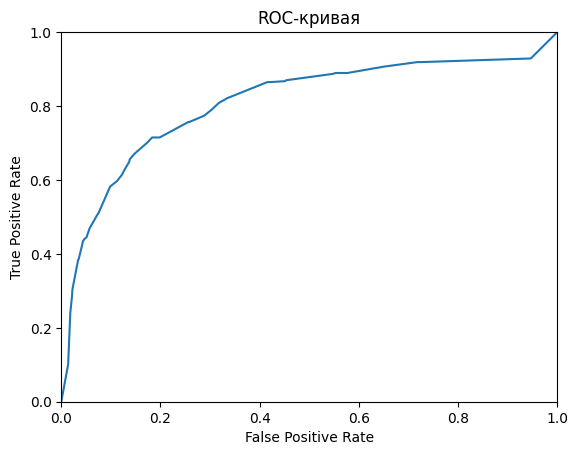

In [33]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель решающего дерева показала наилучший результат  F1 = 0.5894519131334023 AUC-ROC = 0.8084093338330627 при max_depth=8

Проверяю модель случайного леса на сбалансированных данных.

In [34]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)


est = 1
  F1 = 0.4410354745925216
  AUC-ROC = 0.6551227652922569
est = 2
  F1 = 0.4592391304347826
  AUC-ROC = 0.7231252824473163
est = 3
  F1 = 0.5105953582240161
  AUC-ROC = 0.7461344241005259
est = 4
  F1 = 0.5127551020408163
  AUC-ROC = 0.765999435490961
est = 5
  F1 = 0.5589798087141339
  AUC-ROC = 0.7875595163730758
est = 6
  F1 = 0.5613608748481166
  AUC-ROC = 0.7924796907847755
est = 7
  F1 = 0.5601703940362087
  AUC-ROC = 0.798025298025298
est = 8
  F1 = 0.5622775800711745
  AUC-ROC = 0.8029184808845826
est = 9
  F1 = 0.5623632385120351
  AUC-ROC = 0.805753365075399
est = 10
  F1 = 0.5775656324582339
  AUC-ROC = 0.8098020979376912
est = 11
  F1 = 0.5755879059350504
  AUC-ROC = 0.8143289668713397
est = 12
  F1 = 0.5842424242424242
  AUC-ROC = 0.8134243642718219
est = 13
  F1 = 0.5774804905239688
  AUC-ROC = 0.814951314951315
est = 14
  F1 = 0.596153846153846
  AUC-ROC = 0.8190740817859462
est = 15
  F1 = 0.5873015873015873
  AUC-ROC = 0.8228521279368737
est = 16
  F1 = 0.594132

In [35]:
model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_balanced, target_balanced)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


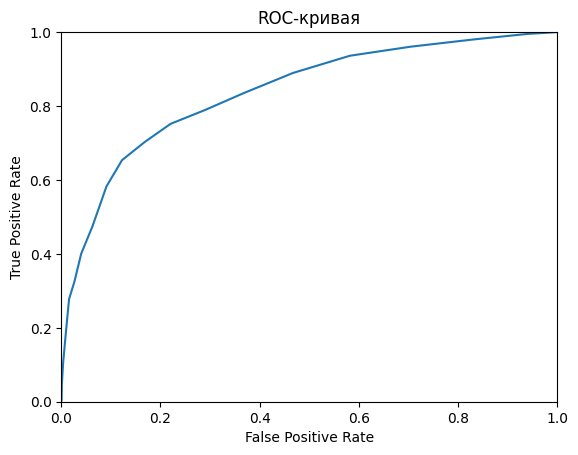

In [36]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель случайного леса показала наилучший результат  F1 = 0.6129032258064515 AUC-ROC = 0.8377021088885495 при n_estimators=19

Проверяю модель логистической регрессии на сбалансированных данных.

In [37]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)


itr = 500
  F1 = 0.5058087578194818
  AUC-ROC = 0.7604075570177264
itr = 600
  F1 = 0.5058087578194818
  AUC-ROC = 0.7604075570177264
itr = 700
  F1 = 0.5058087578194818
  AUC-ROC = 0.7604075570177264
itr = 800
  F1 = 0.5058087578194818
  AUC-ROC = 0.7604075570177264
itr = 900
  F1 = 0.5058087578194818
  AUC-ROC = 0.7604075570177264


In [38]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500)
model.fit(features_balanced, target_balanced)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


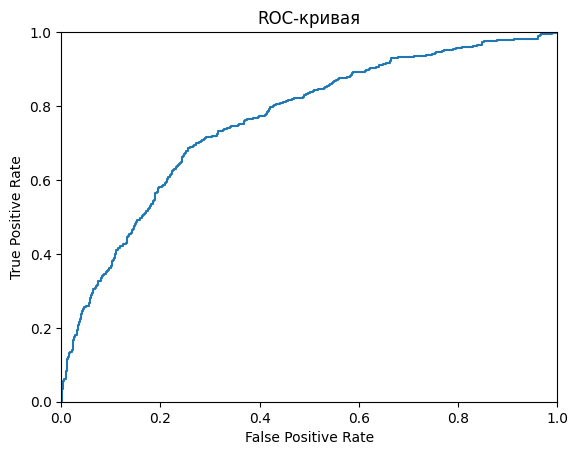

In [39]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель логистической регрессии показала наилучший результат F1 = 0.5058087578194818 AUC-ROC = 0.7604075570177264 при max_iter=500

## Вывод

На сбалансированных данных наилучший результат достигнут моделью случайного леса F1 = 0.6129032258064515 AUC-ROC = 0.8377021088885495 при n_estimators=19

## Тестирование модели

Проверяю модель случайного леса с n_estimators=19 на тестовой выборке.

In [40]:
model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_balanced, target_balanced)
predictions_test = model.predict(features_test) 
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predictions_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("F1-мера:", f1)
print("AUC-ROC:", auc_roc)

F1-мера: 0.3024785027819929
AUC-ROC: 0.4186598000157322


Данные метрик неудовлетворительные. Это связано, скорее всего, с тем, что модель обучалась на масштабированных данных, а прогноз делается не на масштабированных. Поэтому масштабирую тестовые данные при помощи техники upsampling.

In [41]:
features_test_upsampled, target_test_upsampled = upsample(features_test, target_test, 2)

features_zeros = features_test_upsampled[target_test_upsampled == 0] 
features_ones = features_test_upsampled[target_test_upsampled == 1] 
target_zeros = target_test_upsampled[target_test_upsampled == 0] 
target_ones = target_test_upsampled[target_test_upsampled == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(1593, 2942)
(814, 2942)
(1593,)
(814,)


Масштабирую тестовую выборку при помощи техники downsampling.

In [42]:
features_test_balanced, target_test_balanced = downsample(features_test_upsampled, target_test_upsampled, 0.511)

features_zeros = features_test_balanced[target_test_balanced == 0] 
features_ones = features_test_balanced[target_test_balanced == 1] 
target_zeros = target_test_balanced[target_test_balanced == 0] 
target_ones = target_test_balanced[target_test_balanced == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(814, 2942)
(814, 2942)
(814,)
(814,)


Провожу финальное тестировоание на сбалансированной выборке. При этом изменяю значение порога в цикле.

In [43]:
predictions_test = model.predict(features_test_balanced) 
probabilities_test = model.predict_proba(features_test_balanced)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test_balanced, predicted_test)
    recall = recall_score(target_test_balanced, predicted_test)
    f1 = 2 * precision * recall / (precision + recall) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.02 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.04 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.06 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.08 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.10 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.12 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.14 | Точность = 0.500, Полнота = 1.000, F1 = 0.667
Порог = 0.16 | Точность = 0.500, Полнота = 0.998, F1 = 0.666
Порог = 0.18 | Точность = 0.500, Полнота = 0.998, F1 = 0.666
Порог = 0.20 | Точность = 0.500, Полнота = 0.998, F1 = 0.666
Порог = 0.22 | Точность = 0.499, Полнота = 0.988, F1 = 0.663
Порог = 0.24 | Точность = 0.499, Полнота = 0.988, F1 = 0.663
Порог = 0.26 | Точность = 0.499, Полнота = 0.988, F1 = 0.663
Порог = 0.28 | Точность = 0.497, Полнота = 0.958, F1 = 0.655


## Вывод

Модель для прогнозирования оттока построена и обучена. Наилучшее значение F1 меры, полученное в процессе тестирования = 0.667

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*